# 03 - Analýza dat

## Cíl tohoto notebooku

V tomto kroku provedeme explorativní analýzu (EDA) hokejových dat připravených v předchozím kroku.

**Co se naučíte:**
- Načítání dat z JSON do pandas DataFrame
- Čištění a transformace dat
- Základní statistickou analýzu
- Vizualizaci dat pomocí matplotlib

**Vstup:** Soubor `data/interim/hockey_teams.json`

**Výstup:** Vyčištěný soubor `data/processed/hockey_teams.csv`

---

## Popis dat

| Sloupec | Popis |
|---------|-------|
| Team Name | Název týmu |
| Year | Rok sezóny |
| Wins | Počet výher |
| Losses | Počet proher |
| OT Losses | Počet proher v prodloužení |
| Win % | Procento výher |
| Goals For (GF) | Vstřelené góly |
| Goals Against (GA) | Obdržené góly |
| + / - | Rozdíl gólů |

---

## Krok 1: Příprava prostředí

### 1.1 Import knihoven

In [1]:
# Doplňte importy: pandas, matplotlib.pyplot, os
import pandas as pd
import matplotlib.pyplot as plt
import os

<details>
<summary>Nápověda</summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
import os

```
</details>

### 1.2 Vytvoření výstupní složky

In [2]:
# Vytvořte složku data/processed
os.makedirs('../data/processed', exist_ok = True)


---

## Krok 2: Načtení dat

### 2.1 Načtení JSON souboru

Načtěte json do dataframu

In [3]:
# Načtěte JSON soubor do df_raw pomocí pd.read_json()
df_raw = pd.read_json('../data/interim/hockey_teams.json')
df_raw.shape

(582, 9)

### 2.2 Kontrola dat

In [4]:
# Zobrazte head() a info()
df_raw.tail()

,Team Name,Year,Wins,Losses,OT Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
577,Tampa Bay Lightning,2011,38,36,8,0.463,235,281,-46
578,Toronto Maple Leafs,2011,35,37,10,0.427,231,264,-33
579,Vancouver Canucks,2011,51,22,9,0.622,249,198,51
580,Washington Capitals,2011,42,32,8,0.512,222,230,-8
581,Winnipeg Jets,2011,37,35,10,0.451,225,246,-21


---

## Krok 3: Přejmenování sloupců

### 3.1 Definice mapování

Použití slovníku je lepší než přímé přiřazení seznamu - je jasné, co se na co mapuje.

In [5]:
# Vytvořte slovník MAPOVANI_SLOUPCU pro přejmenování
# Příklad: 'Team Name': 'team'

MAPOVANI_SLOUPCU = {
    'Team Name': 'team',
    'Year': 'season',
    'Wins': 'victories',
    'Losses': 'defeats',
    'OT Losses': 'overtime_defeats',
    'Win %': 'victory_percentage',
    'Goals For (GF)': 'scored_goals',
    'Goals Against (GA)': 'received_goals',
    '+ / -': 'goal_difference'
}


<details>
<summary>Nápověda</summary>

```python
MAPOVANI_SLOUPCU = {
    'Team Name': 'team',
    'Year': 'season',
    'Wins': 'victories',
    'Losses': 'defeats',
    'OT Losses': 'overtime_defeats',
    'Win %': 'victory_percentage',
    'Goals For (GF)': 'scored_goals',
    'Goals Against (GA)': 'received_goals',
    '+ / -': 'goal_difference'
}
```
</details>

### 3.2 Aplikace přejmenování

In [27]:
# Vytvořte df jako kopii a přejmenujte sloupce

df = df_raw.copy()

df.rename(columns = MAPOVANI_SLOUPCU, inplace = True)

In [28]:
df.head()

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
0,Boston Bruins,1990,44,24,,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,,0.388,292,278,14
2,Calgary Flames,1990,46,26,,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,,0.425,273,298,-25


<details>
<summary>Nápověda</summary>
    
* df -> vytvor kopii jako `df_raw.copy()`
* přemenuj sloupce přes `rename()` a mapovani, nezapomeň na `inplace`
</details>

In [32]:
df_raw.describe()

,Year,Wins,Losses,Win %,Goals For (GF),Goals Against (GA),+ / -
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,2000.907216,36.943299,32.353952,0.458519,234.063574,234.063574,0.000000
std,6.330674,8.926081,8.411439,0.102237,40.548915,42.510718,45.277458
min,1990.000000,9.000000,11.000000,0.119000,115.000000,115.000000,-196.000000
25%,1996.000000,31.000000,27.000000,0.390000,211.000000,207.000000,-27.000000
50%,2001.000000,38.000000,31.000000,0.463000,231.000000,232.500000,4.000000
75%,2007.000000,43.000000,37.000000,0.534000,254.000000,258.750000,31.000000
max,2011.000000,62.000000,71.000000,0.756000,369.000000,414.000000,144.000000


In [33]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582 entries, 0 to 581
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Team Name           582 non-null    object 
 1   Year                582 non-null    int64  
 2   Wins                582 non-null    int64  
 3   Losses              582 non-null    int64  
 4   OT Losses           582 non-null    object 
 5   Win %               582 non-null    float64
 6   Goals For (GF)      582 non-null    int64  
 7   Goals Against (GA)  582 non-null    int64  
 8   + / -               582 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 41.1+ KB


---

## Krok 4: Čištění dat

### 4.1 Analýza sloupce overtime_defeats

In [13]:
# Zjistěte, jaké hodnoty obsahuje sloupec overtime_defeats - počet proher v prodloužení
df.overtime_defeats.unique()

array(['', '3', '4', '6', '5', '0', '2', '1', '8', '7', '9', '12', '16',
       '11', '13', '14', '15', '10', '18'], dtype=object)

In [11]:
df['overtime_defeats'].unique()

array(['', '3', '4', '6', '5', '0', '2', '1', '8', '7', '9', '12', '16',
       '11', '13', '14', '15', '10', '18'], dtype=object)

### 4.2 Nahrazení prázdných hodnot a převod typu

<details>
<summary>Nápověda</summary>
    
použi `loc` a masku /`replace()` 

potom `astype()`

</details>

In [29]:
#naraz
df['overtime_defeats'] = df['overtime_defeats'].replace('', 0).astype(int)

In [30]:
df.overtime_defeats.unique()

array([ 0,  3,  4,  6,  5,  2,  1,  8,  7,  9, 12, 16, 11, 13, 14, 15, 10,
       18])

---

## Krok 5: Základní průzkum dat

### 5.1 Počet týmů v datasetu

In [36]:
# Zjistěte počet týmů 
teams_total = df['team'].nunique()
teams_total

35

<details>
<summary>Nápověda</summary>
    
použi `unique()`

</details>

### 5.2 Počet sezón

In [38]:
# Zjistěte počet unikátních sezón
seasons_total = df['season'].nunique()
seasons_total

21

### 5.3 Časový rozsah dat

In [41]:
# Zjistěte první a poslední rok v datech pomocí min() a max()
min_season = df['season'].unique().min()
max_season = df['season'].unique().max()
print(min_season)
print(max_season)

1990
2011


### 5.4 Kontrola souvislosti dat

Zkontrolujte, zda jsou data pro všechny roky v rozsahu.

In [47]:
# Porovnejte očekávané roky s reálnými v datech

ocekavane = set(range(min_season, max_season + 1))
realne = set(df['season'].unique())
print("Chybí rok: ", ocekavane - realne)

Chybí rok:  {2004}


<details>
<summary>Nápověda</summary>

* Zjištěte unikátní hodnoty a konvertujte je na množinu
* `range(první, poslední + 1)` konvertujte na množinu
* porovnejte množiny odečítaním

</details>

### 5.5 Popisná statistika numerických sloupců

To this end, describe and analyze the results for the following columns:

- victories
- defeats
- overtime_defeats
- victory_percentage
- scored_goals
- received_goals
- goal_difference

We are interested in the following statistics:
- mean,
- count,
- standard deviation,
- percentiles = `[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]`

In [51]:
# Zobrazte statistiky pomocí describe()
# Použijte percentily [0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1]
df.describe(percentiles=[0, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 1])

,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,2000.907216,36.943299,32.353952,4.589347,0.458519,234.063574,234.063574,0.000000
std,6.330674,8.926081,8.411439,4.605402,0.102237,40.548915,42.510718,45.277458
min,1990.000000,9.000000,11.000000,0.000000,0.119000,115.000000,115.000000,-196.000000
0%,1990.000000,9.000000,11.000000,0.000000,0.119000,115.000000,115.000000,-196.000000
5%,1991.000000,21.050000,20.000000,0.000000,0.280300,175.050000,168.050000,-72.000000
10%,1992.000000,24.100000,23.000000,0.000000,0.321000,190.100000,187.000000,-57.000000
25%,1996.000000,31.000000,27.000000,0.000000,0.390000,211.000000,207.000000,-27.000000
50%,2001.000000,38.000000,31.000000,4.000000,0.463000,231.000000,232.500000,4.000000
75%,2007.000000,43.000000,37.000000,8.000000,0.534000,254.000000,258.750000,31.000000


<details>
<summary>Nápověda</summary>

    použijte `describe()` a jako parametr vložte list s percentily

</details>

---
# `team`
In this section, we will conduct a series of analyses on individual teams participating in the leagues. This will allow us to identify the teams that have performed best in the competitions over the years.


## Krok 6: Analýza týmů

### 6.1 Týmy hrající všechny sezóny

In [58]:
# Najděte týmy, které hrály ve všech sezónách
# Spočítejte počet sezón pro každý tým a porovnejte s celkovým počtem
teams_seasons = df.groupby('team')['season'].nunique().sort_values(ascending = False)

In [57]:
teams_seasons = (df
                 .groupby('team')['season']
                 .nunique()
                 .sort_values(ascending = False)
                )

In [60]:
seasons_number = df['season'].nunique()

In [67]:
teams_seasons[teams_seasons == seasons_number].index.tolist()

['Boston Bruins',
 'Calgary Flames',
 'Buffalo Sabres',
 'St. Louis Blues',
 'Washington Capitals',
 'Chicago Blackhawks',
 'Detroit Red Wings',
 'Los Angeles Kings',
 'Montreal Canadiens',
 'Edmonton Oilers',
 'Toronto Maple Leafs',
 'Philadelphia Flyers',
 'New York Rangers',
 'Vancouver Canucks',
 'Pittsburgh Penguins',
 'New York Islanders',
 'New Jersey Devils']

<details>
<summary>Nápověda</summary>
    
* `nunique()` - počet různych sezon
* `groupby()` - rozdělit podle týmů a pro každý spočítat počet sezon
* vybrat jenom řádky pro týmy, které mají počet sezon = počtu 21
* `index.tolist()` vrátí seznam s názvem týmů
    
</details>

### 6.2 Nejlepší týmy podle průměrného procenta výher

In [71]:
# Najděte 5 týmů s nejvyšším průměrným victory_percentage
teams_victory = df.groupby('team')['victory_percentage'].mean().sort_values(ascending = False).head(5)
teams_victory

team
Detroit Red Wings     0.586000
New Jersey Devils     0.534333
Anaheim Ducks         0.522333
Dallas Stars          0.516889
Colorado Avalanche    0.516062
Name: victory_percentage, dtype: float64

In [72]:
teams_victory.index.tolist()

['Detroit Red Wings',
 'New Jersey Devils',
 'Anaheim Ducks',
 'Dallas Stars',
 'Colorado Avalanche']

<details>
<summary>Nápověda</summary>

* `sort_values()` ... `head(5)`

</details>

### 6.3 Vítězové sezón

Předpokládejme, že vítěz sezóny je tým s nejvíce výhrami v dané sezóně.

In [87]:
# Pro každou sezónu najděte tým s nejvíce výhrami

season_winner_idx = df.groupby('season')['victories'].idxmax()
season_winners = df.loc[season_winner_idx, ['season', 'team',  'victories']]
season_winners

,season,team,victories
3,1990,Chicago Blackhawks,49
33,1991,New York Rangers,50
58,1992,Pittsburgh Penguins,56
81,1993,New York Rangers,52
99,1994,Detroit Red Wings,33
126,1995,Detroit Red Wings,62
150,1996,Colorado Avalanche,49
178,1997,Dallas Stars,49
204,1998,Dallas Stars,51
247,1999,St. Louis Blues,51


<details>
<summary>Nápověda</summary>

* Index nejlepšího týmu v každé sezóně - `idxmax()`
* `df.loc[index, ['season', 'team', 'victories']]`
* `value_counts()` pro každý tým

</details>

### 6.4 Týmy, které nikdy nevyhrály sezónu

In [95]:
len(set(df['team'].unique()))

35

In [99]:
len(set(season_winners['team']))

12

In [103]:
# Zjistěte, kolik týmů nikdy nevyhrálo žádnou sezónu

non_winners = set(df['team'].unique()) - set(season_winners['team'])
len(non_winners)

23

<details>
<summary>Nápověda</summary>

* vsechny týmy z unikátních hodnot
* vitezne týmy z `vitezove`
* nevítezné jako rozdíl množin

```
</details>

---
# `overtime_defeats`

The `overtime_defeats` variable informs us how many times a team lost in overtime throughout the year.  
  
In this section, we will perform the following exercises:  
- Identify the team that most frequently lost in overtime.  
- Rank the teams based on the number of overtime losses.  
- Calculate what percentage of teams lost at least once in overtime.  
- Determine the season with the highest number of games decided in overtime.  
  
> Let's make sure that the `overtime_defeats` column is of numeric type!

## Krok 7: Analýza proher v prodloužení

### 7.1 Tým s nejvíce prohrami v prodloužení

In [111]:
# Najděte tým s nejvyšším součtem proher v prodloužení
df.groupby('team')['overtime_defeats'].sum().sort_values(ascending = False).head(1).reset_index()


,team,overtime_defeats
0,Florida Panthers,124


<details>
<summary>Nápověda</summary>

* `groupby('team')` .. `sum()` ... `sort_values()`.. `head()`
* `reset_index()` - volitelné
  
</details>

In [112]:
(df
 .groupby('team')['overtime_defeats']
 .sum()
 .sort_values(ascending = False)
 .head(1)
 .reset_index()
)

,team,overtime_defeats
0,Florida Panthers,124


### 7.2 Procento týmů s alespoň jednou prohrou v prodloužení

In [114]:
# Spočítejte procento záznamů s overtime_defeats > 0
df.loc[df['overtime_defeats'] > 0, 'team'].unique()

array(['Mighty Ducks of Anaheim', 'Atlanta Thrashers', 'Boston Bruins',
       'Buffalo Sabres', 'Calgary Flames', 'Chicago Blackhawks',
       'Colorado Avalanche', 'Dallas Stars', 'Detroit Red Wings',
       'Edmonton Oilers', 'Florida Panthers', 'Los Angeles Kings',
       'Montreal Canadiens', 'Nashville Predators', 'New Jersey Devils',
       'New York Islanders', 'New York Rangers', 'Ottawa Senators',
       'Philadelphia Flyers', 'Phoenix Coyotes', 'Pittsburgh Penguins',
       'San Jose Sharks', 'St. Louis Blues', 'Tampa Bay Lightning',
       'Toronto Maple Leafs', 'Vancouver Canucks', 'Washington Capitals',
       'Carolina Hurricanes', 'Columbus Blue Jackets', 'Minnesota Wild',
       'Anaheim Ducks', 'Winnipeg Jets'], dtype=object)

In [117]:
teams_total = df['team'].nunique()
teams_total

35

In [116]:
len(df.loc[df['overtime_defeats'] > 0, 'team'].unique())/teams_total

0.9142857142857143

<details>
<summary>Nápověda</summary>

* radky, kde je hodnota 'overtime_defeats' > 0
* `unique()` pro týmy
* počet takových řádků děleno počet všech týmů
  
</details>

---
# `goals_ratio`
Based on the variables `scored_goals` and `received_goals`, we will create a new variable - `goals_ratio`, defined as the ratio of goals scored to goals conceded.

Before we proceed with solving the task, let's consider the following issues:
- What values of the `goals_ratio` statistic can be considered indicative of good or poor team performance?
- In what situations can we determine that a team performed better or worse based on the value of `goals_ratio`?

## Krok 8: Vytvoření nové proměnné goals_ratio

### 8.1 Výpočet poměru gólů

In [118]:
df.head()

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference
0,Boston Bruins,1990,44,24,0,0.550,299,264,35
1,Buffalo Sabres,1990,31,30,0,0.388,292,278,14
2,Calgary Flames,1990,46,26,0,0.575,344,263,81
3,Chicago Blackhawks,1990,49,23,0,0.613,284,211,73
4,Detroit Red Wings,1990,34,38,0,0.425,273,298,-25


In [119]:
# Vytvořte nový sloupec goals_ratio = scored_goals / received_goals
df['goals_ratio'] = df['scored_goals']/df['received_goals']

In [122]:
df.head()

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference,goals_ratio
0,Boston Bruins,1990,44,24,0,0.550,299,264,35,1.132576
1,Buffalo Sabres,1990,31,30,0,0.388,292,278,14,1.050360
2,Calgary Flames,1990,46,26,0,0.575,344,263,81,1.307985
3,Chicago Blackhawks,1990,49,23,0,0.613,284,211,73,1.345972
4,Detroit Red Wings,1990,34,38,0,0.425,273,298,-25,0.916107


<details>
<summary>Nápověda</summary>

jenom jednoduché přirazení

</details>

## Distribution of the variable `goals_ratio`

Let's generate the distribution of the variable `goals_ratio` using the `plt.hist` function from the `matplotlib` library, performing the task in two variants:
- with the number of bins determined using Rice's Rule,
- with the number of bins determined using the Square Root Rule.

Methods and formulas for determining the number of bins in a histogram can be found at this link: [Determining the number of bins in a histogram](https://www.statology.org/sturges-rule/).

**Tip:** To determine the distribution of a variable using `matplotlib`, you can use the `hist` function, available here: [Documentation for hist function](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html).

What are the floor and ceiling of a number - [Floor and ceiling of a number - Wikipedia](https://en.wikipedia.org/wiki/Floor_and_ceiling_functions)
> Question: How to calculate the ceiling of a number in Python without using additional libraries?

### 8.2 Histogram goals_ratio

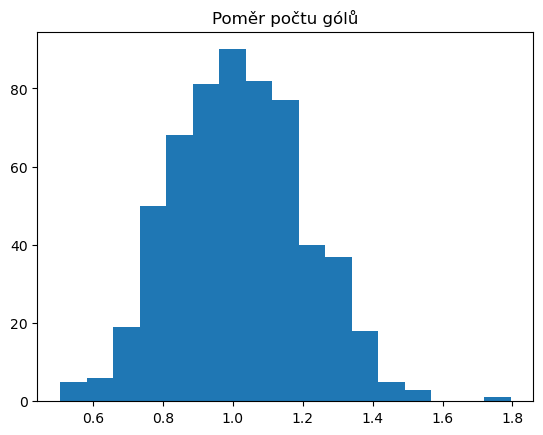

In [129]:
# Vytvořte histogram pomocí plt.hist()
# Použijte Rice's rule pro počet binů: ceil(2 * n^(1/3)+1) nebo Root rule

n = len(df)

plt.hist(df['goals_ratio'],
        bins = int(2 * n ** (1/3) + 1))
plt.title('Poměr počtu gólů')
plt.show()

<details>
<summary>Nápověda</summary>

* výpočet
* `plt.hist()`
* `plt.figure(figsize=(, ))` `plt.hist()` `plt.xlabel()` `plt.title()` `plt.legend()` `plt.show()`    

```python

n = len(df)
bins_amount = int(2*(n ** (1/3)) + 1)

bins_amount = int(df['goals_ratio'].count() ** (1/2)+1)

```
</details>

----
# `victory_percentage`

Similar to the analysis of the variable `goals_ratio`, we will conduct an exploratory analysis of `victory_percentage` by following these steps:  
- Determine the basic descriptive statistics, such as the mean, median, standard deviation, minimum, and maximum.  
- Examine the distribution of the variable by using a histogram to better understand its characteristics.  
- Check if there are any obvious subgroups of teams within the variable under analysis that could be identified based on specific criteria, such as the range of the variable's values.

## Krok 9: Analýza victory_percentage

### 9.1 Histogram victory_percentage

In [130]:
df.head()

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference,goals_ratio
0,Boston Bruins,1990,44,24,0,0.550,299,264,35,1.132576
1,Buffalo Sabres,1990,31,30,0,0.388,292,278,14,1.050360
2,Calgary Flames,1990,46,26,0,0.575,344,263,81,1.307985
3,Chicago Blackhawks,1990,49,23,0,0.613,284,211,73,1.345972
4,Detroit Red Wings,1990,34,38,0,0.425,273,298,-25,0.916107


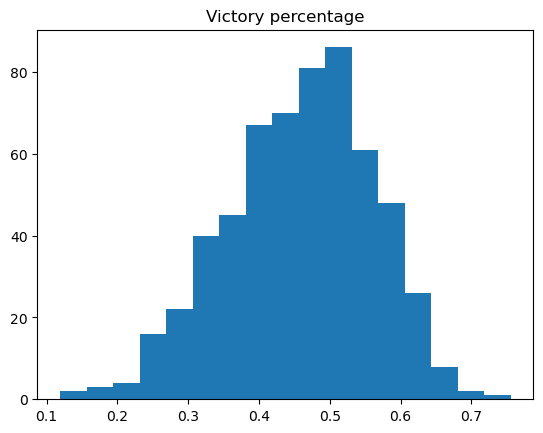

In [134]:
# Vytvořte histogram pro victory_percentage

plt.hist(
    df['victory_percentage'],
    bins = int(2 * n ** (1/3) + 1)
)
plt.title('Victory percentage')
plt.show()

# `goals_ratio` vs `victory_percentage`

We have already analyzed `goals_ratio` and `victory_percentage` as two separate variables. Now, our task is to analyze them together to identify potential interdependencies between them.  
  
In this step, we will perform the following exercises:  
- Before starting the analysis, let’s consider whether these variables might be dependent or independent of each other. What kind of relationship can be expected based on their business descriptions?  
- We will create a scatterplot to visually represent the dependencies between these variables.  
- We will determine the relationship between the variables based on the scatterplot.  
- We will analyze the scatterplot to identify any outliers, paying special attention to their common distribution.

---

## Krok 10: Vztah mezi goals_ratio a victory_percentage

### 10.1 Bodový graf (scatter plot)

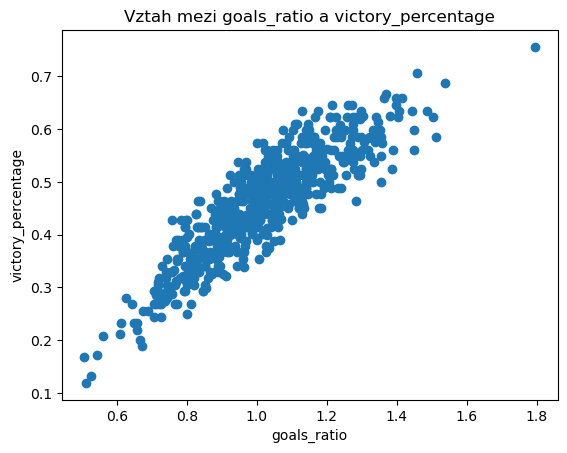

In [137]:
# Vytvořte scatter plot pro goals_ratio vs victory_percentage
plt.scatter(
    df['goals_ratio'],
    df['victory_percentage']
)

plt.xlabel('goals_ratio')
plt.ylabel('victory_percentage')

plt.title('Vztah mezi goals_ratio a victory_percentage')
plt.show()

<details>
<summary>Nápověda</summary>

```python
plt.figure(figsize=(10, 6))
plt.scatter(x = ,
            y = , 
            alpha=0.5)
plt.xlabel...

plt.show()
```
</details>

### 10.2 Analýza odlehlých hodnot

If we have identified outlying observations at an earlier stage of analysis, let's now examine these specific cases. We will focus on outliers concerning the variables `goals_ratio` and `victory_percentage` to understand what features distinguish them.

The following steps should be taken for analysis:
1. Identify the specific outlying observations that were detected earlier.
2. Analyze the characteristics of these observations, paying attention to their values for the variables `goals_ratio` and `victory_percentage`.
3. Try to understand what might have caused their outlying nature. Are these instances of anomalies, or could they be the result of natural fluctuations in the data?

Podívejte se na záznamy, které se vymykají z trendu.

In [138]:
# Najděte záznamy s neobvyklými hodnotami
# Např. vysoké goals_ratio ale nízké victory_percentage
df.loc[df['goals_ratio'] > 1.6]

,team,season,victories,defeats,overtime_defeats,victory_percentage,scored_goals,received_goals,goal_difference,goals_ratio
126,Detroit Red Wings,1995,62,13,0,0.756,325,181,144,1.79558


---
# Summary

In this notebook, we conducted a basic exploratory analysis of our dataset. The data was cleaned and then enriched with new variables, which we subjected to further analysis. The final step of this part is to save the processed data to a CSV file.  
  
**Let's save our data frame to the file:** `data/processed/hockey_teams.csv`, using a semicolon (`;`) as the column separator.

Next, in the following phase of our work, we will propose betting odds based on the analyzed historical data and discuss the results of this analysis.

## Krok 11: Uložení vyčištěných dat

### 11.1 Export do CSV

In [140]:
# Uložte DataFrame do CSV souboru
# Cesta: data/processed/hockey_teams.csv
# Oddělovač: ;
# Bez indexu: index=False

CSV_FILE = '../data/processed/hockey_teams.csv' 
df.to_csv( CSV_FILE, sep = ';', index = False)
print(f'Dataframe uložený do csv {CSV_FILE}')


Dataframe uložený do csv ../data/processed/hockey_teams.csv


<details>
<summary>Nápověda</summary>

```python
df.to_csv()

```
</details>

---

## Shrnutí

V tomto notebooku jste se naučili:
- Načítat a čistit data pomocí pandas
- Používat slovníky pro přejmenování sloupců
- Provádět základní explorativní analýzu
- Vytvářet vizualizace pomocí matplotlib
- Analyzovat vztahy mezi proměnnými

**Klíčová zjištění:**
- Dataset obsahuje data za více než 20 sezón
- Existuje silná korelace mezi poměrem gólů a procentem výher
- Některé týmy hrály všechny sezóny, jiné jen několik

**Další krok:** Přejděte k notebooku `04_BusinessRecommedation.ipynb`, kde navrhneme sázkové kurzy.

---

## Tipy pro vylepšení

1. **Použití korelační matice:**
```python
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
```

2. **Automatická detekce odlehlých hodnot:**
```python
Q1 = df['goals_ratio'].quantile(0.25)
Q3 = df['goals_ratio'].quantile(0.75)
IQR = Q3 - Q1
odlehle = df[(df['goals_ratio'] < Q1 - 1.5*IQR) | 
             (df['goals_ratio'] > Q3 + 1.5*IQR)]
```

3. **Přidání trendové linie:**
```python
import numpy as np
z = np.polyfit(df['goals_ratio'], df['victory_percentage'], 1)
p = np.poly1d(z)
plt.plot(df['goals_ratio'].sort_values(), 
         p(df['goals_ratio'].sort_values()), 'r--')
```